<a href="https://colab.research.google.com/github/hardik1408/CS771/blob/hardik/emoticon_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## loading the files


In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the CSV files
train_df = pd.read_csv('train_emoticon.csv')
validation_df = pd.read_csv('valid_emoticon.csv')

# Assuming the CSV files have 'emojis' and 'label' columns
train_texts = train_df['input_emoticon'].values
train_labels = train_df['label'].values

validation_texts = validation_df['input_emoticon'].values
validation_labels = validation_df['label'].values

## preprocessing on input

In [2]:
#  Tokenize and pad the emoji sequences
tokenizer = Tokenizer(char_level=True)  # Tokenizing each emoji as a character
tokenizer.fit_on_texts(train_texts)  # Fit only on training data

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
validation_sequences = tokenizer.texts_to_sequences(validation_texts)

# Pad the sequences to the same length
max_len = max([len(seq) for seq in train_sequences])  # Maximum sequence length in train data
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post')
validation_padded = pad_sequences(validation_sequences, maxlen=max_len, padding='post')

# Convert labels into numeric format if they are not (if necessary)
train_labels = train_labels.astype(int)
validation_labels = validation_labels.astype(int)

## dividing data for the task

In [23]:
import numpy as np
x_train_100 = train_padded
y_train_100 = train_labels
# prompt: take only 80% of the training dataset

train_size_80 = int(len(x_train_100) * 0.8)
x_train_80 = x_train_100[:train_size_80]
y_train_80 = y_train_100[:train_size_80]
# prompt: take only 60% of training data

# Shuffle the indices of the training data
indices = np.arange(len(x_train_100))
np.random.shuffle(indices)

# Calculate the number of samples for 60% of the data
train_size_60_random = int(len(x_train_100) * 0.6)

# Select the shuffled indices for the 60% split
x_train_60 = x_train_100[indices[:train_size_60_random]]
y_train_60 = y_train_100[indices[:train_size_60_random]]

indices = np.arange(len(x_train_100))
np.random.shuffle(indices)

# Calculate the number of samples for 60% of the data
train_size_40_random = int(len(x_train_100) * 0.4)

# Select the shuffled indices for the 60% split
x_train_40 = x_train_100[indices[:train_size_40_random]]
y_train_40 = y_train_100[indices[:train_size_40_random]]

indices = np.arange(len(x_train_100))
np.random.shuffle(indices)

# Calculate the number of samples for 60% of the data
train_size_20_random = int(len(x_train_100) * 0.2)

# Select the shuffled indices for the 60% split
x_train_20 = x_train_100[indices[:train_size_20_random]]
y_train_20 = y_train_100[indices[:train_size_20_random]]



### model


In [5]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary for reference
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 100%

In [6]:
model.fit(x_train_100, y_train_100, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.6056 - loss: 0.6168 - val_accuracy: 0.8753 - val_loss: 0.5164
Epoch 2/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8740 - loss: 0.2906 - val_accuracy: 0.9039 - val_loss: 0.3017
Epoch 3/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.8861 - loss: 0.2572 - val_accuracy: 0.9059 - val_loss: 0.2217
Epoch 4/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8926 - loss: 0.2384 - val_accuracy: 0.8998 - val_loss: 0.2409
Epoch 5/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9067 - loss: 0.2083 - val_accuracy: 0.9141 - val_loss: 0.1972
Epoch 6/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9144 - loss: 0.1899 - val_accuracy: 0.9121 - val_loss: 0.1517
Epoch 7/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9398 - loss: 0.1501 - val_accuracy: 0.9387 - val_loss: 0.1616
Epoch 8/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9429 - loss: 0.1425 - v

### 80%

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary for reference
model.summary()
model.fit(x_train_80, y_train_80, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.5955 - loss: 0.6269 - val_accuracy: 0.8732 - val_loss: 0.5525
Epoch 2/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.8605 - loss: 0.3147 - val_accuracy: 0.8753 - val_loss: 0.4077
Epoch 3/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.8958 - loss: 0.2545 - val_accuracy: 0.8834 - val_loss: 0.2541
Epoch 4/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8906 - loss: 0.2474 - val_accuracy: 0.9141 - val_loss: 0.1934
Epoch 5/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.9022 - loss: 0.2266 - val_accuracy: 0.9202 - val_loss: 0.2140
Epoch 6/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9063 - loss: 0.2030 - val_accuracy: 0.9264 - val_loss: 0.1810
Epoch 7/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9207 - loss: 0.1829 - val_accuracy: 0.9202 - val_loss: 0.1731
Epoch 8/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9333 - loss: 0.1573 - val_

### 60%

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary for reference
model.summary()
model.fit(x_train_60, y_train_60, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy_60 = model.evaluate(validation_padded, validation_labels)

# Print the final accuracy
print(f'Validation Accuracy: {accuracy_60:.4f}')

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_16 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_17 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.5657 - loss: 0.6483 - val_accuracy: 0.7403 - val_loss: 0.5940
Epoch 2/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.8546 - loss: 0.3233 - val_accuracy: 0.8855 - val_loss: 0.4835
Epoch 3/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.8850 - loss: 0.2673 - val_accuracy: 0.9121 - val_loss: 0.3570
Epoch 4/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8899 - loss: 0.2563 - val_accuracy: 0.9182 - val_loss: 0.2335
Epoch 5/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.8950 - loss: 0.2510 - val_accuracy: 0.9182 - val_loss: 0.2158
Epoch 6/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9087 - loss: 0.2193 - val_accuracy: 0.8753 - val_loss: 0.2807
Epoch 7/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9025 - loss: 0.2176 - val_accuracy: 0.9121 - val_loss: 0.2072
Epoch 8/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9139 - loss: 0.1979 - val_ac

### 40%

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary for reference
model.summary()
model.fit(x_train_40, y_train_40, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy_40 = model.evaluate(validation_padded, validation_labels)

# Print the final accuracy
print(f'Validation Accuracy: {accuracy_40:.4f}')


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_18 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_19 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.5552 - loss: 0.6811 - val_accuracy: 0.7587 - val_loss: 0.6300
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8297 - loss: 0.3829 - val_accuracy: 0.8834 - val_loss: 0.5439
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8584 - loss: 0.3083 - val_accuracy: 0.8957 - val_loss: 0.4536
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8870 - loss: 0.2536 - val_accuracy: 0.8487 - val_loss: 0.3885
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9073 - loss: 0.2148 - val_accuracy: 0.9018 - val_loss: 0.3020
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9069 - loss: 0.2133 - val_accuracy: 0.8875 - val_loss: 0.3018
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9106 - loss: 0.2024 - val_accuracy: 0.8916 - val_loss: 0.3020
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9217 - loss: 0.1907 - val_accuracy: 0.9059 - 

### 20%

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary for reference
model.summary()
model.fit(x_train_20, y_train_20, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy_20 = model.evaluate(validation_padded, validation_labels)

# Print the final accuracy
print(f'Validation Accuracy: {accuracy_20:.4f}')


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_20 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_21 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.5014 - loss: 0.7008 - val_accuracy: 0.6115 - val_loss: 0.6921
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6998 - loss: 0.6010 - val_accuracy: 0.8282 - val_loss: 0.6209
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.8764 - loss: 0.3004 - val_accuracy: 0.7280 - val_loss: 0.5972
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9020 - loss: 0.2320 - val_accuracy: 0.8671 - val_loss: 0.5288
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9197 - loss: 0.2096 - val_accuracy: 0.8241 - val_loss: 0.4768
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9264 - loss: 0.1886 - val_accuracy: 0.8609 - val_loss: 0.4455
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9387 - loss: 0.1630 - val_accuracy: 0.8384 - val_loss: 0.4008
Epoch 8/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9567 - loss: 0.1178 - val_accuracy: 0.8282 - 

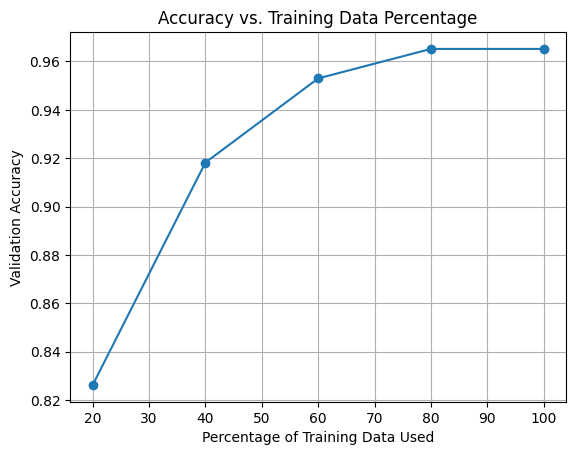

In [15]:
# prompt: create a plot which plots the accuracy vs the percentage of training data used

import matplotlib.pyplot as plt

# Assuming you have the accuracy values for each training data percentage stored in a list
training_data_percentages = [20, 40, 60, 80, 100]
accuracies = [0.8262, 0.9182, 0.9530, 0.9652, 0.9652]  # Replace with your actual accuracy values


# Create the plot
plt.plot(training_data_percentages, accuracies, marker='o')
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy vs. Training Data Percentage')
plt.grid(True)
plt.show()


In [ ]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))  # Embedding layer
model.add(LSTM(16))  # LSTM layer with 16 units
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Train the model using the training data and validate on the validation set
model.fit(train_padded, train_labels, epochs=30, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)
print(f'Validation Accuracy: {accuracy}')


Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9450 - loss: 0.1328 - val_accuracy: 0.9387 - val_loss: 0.1429
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9520 - loss: 0.1197 - val_accuracy: 0.9284 - val_loss: 0.1512
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9556 - loss: 0.1115 - val_accuracy: 0.9407 - val_loss: 0.1292
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9556 - loss: 0.1123 - val_accuracy: 0.9305 - val_loss: 0.1426
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9644 - loss: 0.0991 - val_accuracy: 0.9387 - val_loss: 0.1372
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9608 - loss: 0.0990 - val_accuracy: 0.9366 - val_loss: 0.1310
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9623 - loss: 0.0958 - val_accuracy: 0.9489 - val_loss: 0.1233
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9573 - loss: 0.1029 - val_accuracy: 

In [ ]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary for reference
model.summary()

# Train the model using the train set and validate on the validation set
model.fit(train_padded, train_labels, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_12 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_13 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.6212 - loss: 0.6068 - val_accuracy: 0.8814 - val_loss: 0.5348
Epoch 2/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8650 - loss: 0.3023 - val_accuracy: 0.9039 - val_loss: 0.3002
Epoch 3/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.8833 - loss: 0.2616 - val_accuracy: 0.8998 - val_loss: 0.2316
Epoch 4/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.8991 - loss: 0.2358 - val_accuracy: 0.8487 - val_loss: 0.2975
Epoch 5/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9001 - loss: 0.2201 - val_accuracy: 0.8671 - val_loss: 0.2746
Epoch 6/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9046 - loss: 0.2053 - val_accuracy: 0.9018 - val_loss: 0.1801
Epoch 7/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9190 - loss: 0.1818 - val_accuracy: 0.9264 - val_loss: 0.1496
Epoch 8/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9411 - loss: 0.1464 - val_a

In [ ]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9761 - loss: 0.1209
Validation Accuracy: 0.9755
